# Atividade 6
Obter a região de tumor na tomografia.

### Importando as bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

C:\Users\danil\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\danil\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\danil\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


### Funções utilizadas

In [99]:
# histogram
def histogram(image):
    # array with size of bins, set to zeros
    histogram = np.zeros(256)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# histogram equalization
def equalizarHist(img):
    vet = histogram(img)
    s = np.zeros((1,256), dtype=int)[0]
    for k in range(0,256):
        Tk = 0
        for j in range(0,k):
            pk = vet[j]/(img.shape[0] * img.shape[1])
            Tk = Tk + pk
        
        s[k] = Tk*255
        img_e = s[img.flatten()]
        im_saida = np.reshape(img_e, img.shape)
    
    return im_saida

#função para correção gamma
def gamma(X, g):
    imgOut = np.array(255*(img / 255) ** g, dtype = 'uint8')
    
    return imgOut

#função para transformação logarítmica
def transLog(X):
    c = 255 / np.log(1 + np.max(X))
    log_image = c * (np.log(X + 1))
    
    log_image = np.array(log_image, dtype = np.uint8)
    return log_image

#função para filtro da média
def filtroMedia(X, size):
    imgOut = X.copy()

    for i in range(size, X.shape[0]-size):
        for j in range(size, X.shape[1]-size):
            subI = X[i-size:i+size+1, j-size:j+size+1]
            m = np.mean(subI)
            imgOut[i][j] = int(m)
    return imgOut

# threshold
def threshold(X, t):
    imgOut = np.zeros(X.shape)
    imgOut[np.where(X > t)] = 255
    
    return imgOut

# function for median filter
def medianFilter(X, size):
    imgOut = X.copy()
    
    for i in range(size, X.shape[0]-size):
        for j in range(size, X.shape[1]-size):
            subI = X[i-size:i+size+1, j-size:j+size+1]
            m = np.median(subI)
            imgOut[i][j] = int(m)
    return imgOut

def getCentroids(img):
    rows, cols = np.where(img == 255)
    cr = int(np.mean(rows))
    cc = int(np.mean(cols))
    
    return cr, cc

# função de adjacência-4
def adj4(i, j, img, imgOut, newPixels):
    if img[i,j-1] == 1 and imgOut[i,j-1] == 0:
        imgOut[i,j-1] = 1
        newPixels = newPixels + 1
    if img[i,j+1] == 1 and imgOut[i,j+1] == 0:
        imgOut[i,j+1] = 1
        newPixels = newPixels + 1
    if img[i-1,j] == 1 and imgOut[i-1,j] == 0:
        imgOut[i-1,j] = 1
        newPixels = newPixels + 1
    if img[i+1,j] == 1 and imgOut[i+1,j] == 0:
        imgOut[i+1,j] = 1
        newPixels = newPixels + 1
    return newPixels

# detectar regiões de conexão
def connectRegions(img, x, y):
    img2 = np.zeros(np.shape(img))
    img2[np.where(img == 0)] = 0
    img2[np.where(img == 255)] = 1
    
    imgOut = np.zeros(np.shape(img))
    imgOut[x,y] = 1
    newPixels = 101
    newPixels2 = 0
    while newPixels>0:
        newPixels = 0
        newPixels2 = 0
        for i in range(1, np.shape(img)[0]-1):
            for j in range(1, np.shape(img)[1]-1):
                if imgOut[i,j] == 1:
                    newPixels = newPixels + adj4(i, j, img2, imgOut, newPixels2)
                    
        for i in range(np.shape(img)[0]-2, 1, -1):
            for j in range(1, np.shape(img)[1]-1):
                if imgOut[i,j] == 1:
                    newPixels = newPixels + adj4(i, j, img2, imgOut, newPixels2)
        #cv2.imshow('saida', imgOut)
        #cv2.waitKey(0)
        
    return imgOut

### Principal

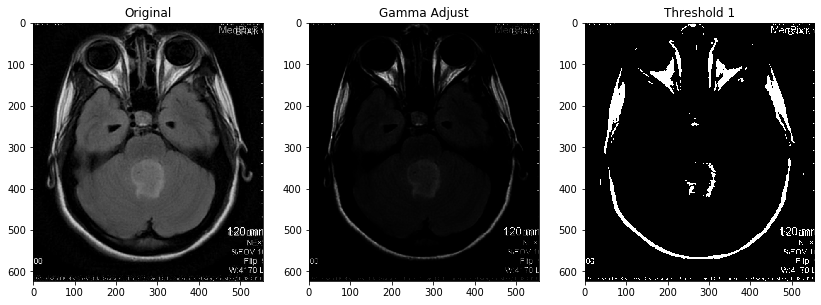

In [78]:
#read the image
img = cv2.imread('test images/CT.jpg', cv2.IMREAD_GRAYSCALE)

imgF = filtroMedia(img, 5)

img2 = gamma(imgF, 3)

#First threshold
img3 = threshold(img2, 20)

fig = plt.figure()
fig.set_figheight(14)
fig.set_figwidth(14)

fig.add_subplot(1,3,1, title='Original')
plt.imshow(img, cmap='gray')

fig.add_subplot(1,3,2, title='Gamma Adjust')
plt.imshow(img2, cmap='gray')

fig.add_subplot(1,3,3, title='Threshold 1')
plt.imshow(img3, cmap='gray')

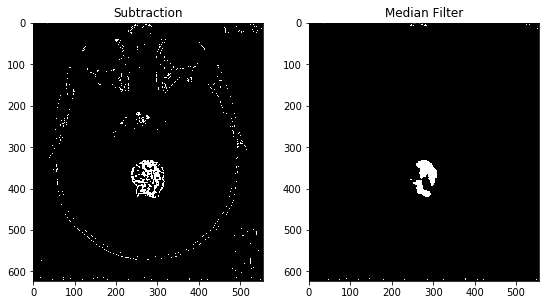

In [92]:
img4 = gamma(imgF, 2) 

# Second threshold
img5 = threshold(img4, 38)

# Subtraction
img6 = img5 - img3

# median filter
img7 = medianFilter(img6, 7)

fig = plt.figure()
fig.set_figheight(14)
fig.set_figwidth(14)

fig.add_subplot(1,3,1, title='Threshold 2')
plt.imshow(img5, cmap='gray')

fig.add_subplot(1,3,2, title='Subtraction')
plt.imshow(img6, cmap='gray')

fig.add_subplot(1,3,3, title='Median Filter')
plt.imshow(img7, cmap='gray')

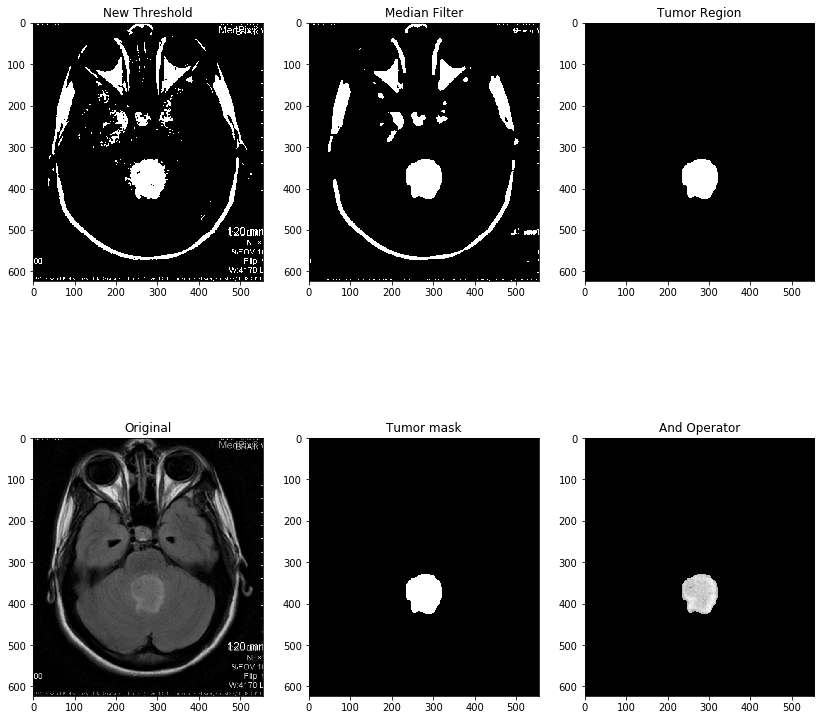

In [100]:
# get centroids
cr, cc = getCentroids(img7)

img5 = threshold(img4, 30)

# median filter
img6 = medianFilter(img5, 5)

# get RI
RI = connectRegions(img6, cr, cc)

imgAnd = img.copy()
imgAnd[np.where(RI == 0)] = 0

fig = plt.figure()
fig.set_figheight(14)
fig.set_figwidth(14)

fig.add_subplot(2,3,1, title='New Threshold')
plt.imshow(img5, cmap='gray')

fig.add_subplot(2,3,2, title='Median Filter')
plt.imshow(img6, cmap='gray')

fig.add_subplot(2,3,3, title='Tumor Region')
plt.imshow(RI, cmap='gray')

fig.add_subplot(2,3,4, title='Original')
plt.imshow(img, cmap='gray')

fig.add_subplot(2,3,5, title='Tumor mask')
plt.imshow(RI, cmap='gray')

fig.add_subplot(2,3,6, title='And Operator')
plt.imshow(imgAnd, cmap='gray')

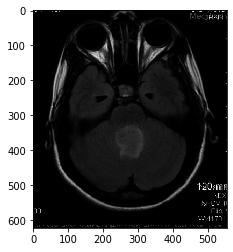

In [101]:

plt.imshow(img4, cmap='gray')